# 회귀 모델

## 회귀모델의 동작 원리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

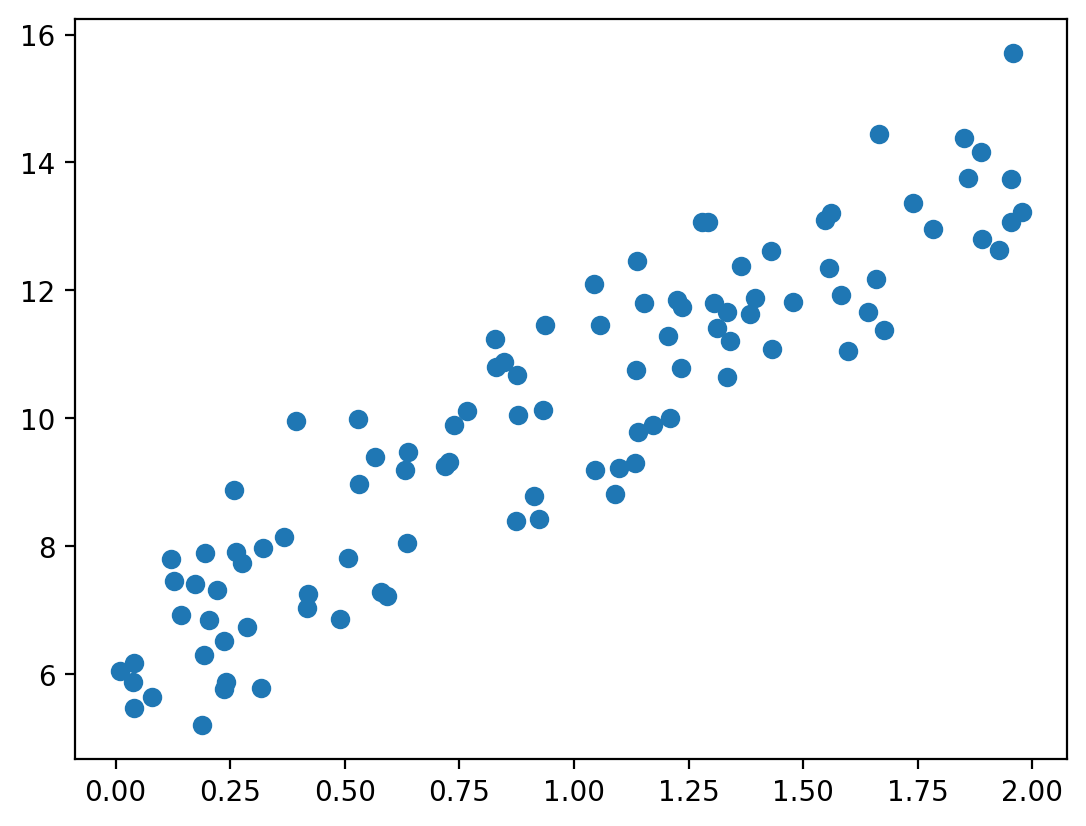

In [4]:
# 램덤 데이터 추출
np.random.seed(0)
X = 2 * np.random.rand(100, 1)

# y = 4x + 6 의 직선 데이터에 노이즈 삽입
y = 6 + 4*X + np.random.randn(100, 1)

plt.scatter(X, y)

a= 0.712 b= 0.892 error= 9.354
a= 1.164 b= 1.313 error= 8.409
a= 1.568 b= 1.691 error= 7.561
a= 1.929 b= 2.031 error= 6.801
a= 2.253 b= 2.337 error= 6.119
a= 2.542 b= 2.612 error= 5.508
a= 2.8 b= 2.86 error= 4.959
a= 3.03 b= 3.084 error= 4.467
a= 3.236 b= 3.285 error= 4.026
a= 3.42 b= 3.466 error= 3.63
a= 3.584 b= 3.63 error= 3.274
a= 3.73 b= 3.778 error= 2.956
a= 3.86 b= 3.911 error= 2.67
a= 3.976 b= 4.032 error= 2.413
a= 4.079 b= 4.141 error= 2.183
a= 4.171 b= 4.24 error= 1.976
a= 4.252 b= 4.329 error= 1.791
a= 4.324 b= 4.411 error= 1.63
a= 4.388 b= 4.484 error= 1.495
a= 4.445 b= 4.551 error= 1.385
a= 4.494 b= 4.613 error= 1.301
a= 4.538 b= 4.668 error= 1.232
a= 4.577 b= 4.719 error= 1.18
a= 4.61 b= 4.765 error= 1.143
a= 4.64 b= 4.808 error= 1.112
a= 4.666 b= 4.847 error= 1.088
a= 4.688 b= 4.883 error= 1.067
a= 4.707 b= 4.916 error= 1.047
a= 4.724 b= 4.946 error= 1.031
a= 4.738 b= 4.974 error= 1.017
a= 4.749 b= 5.0 error= 1.006
a= 4.759 b= 5.024 error= 0.997
a= 4.767 b= 5.047 error= 

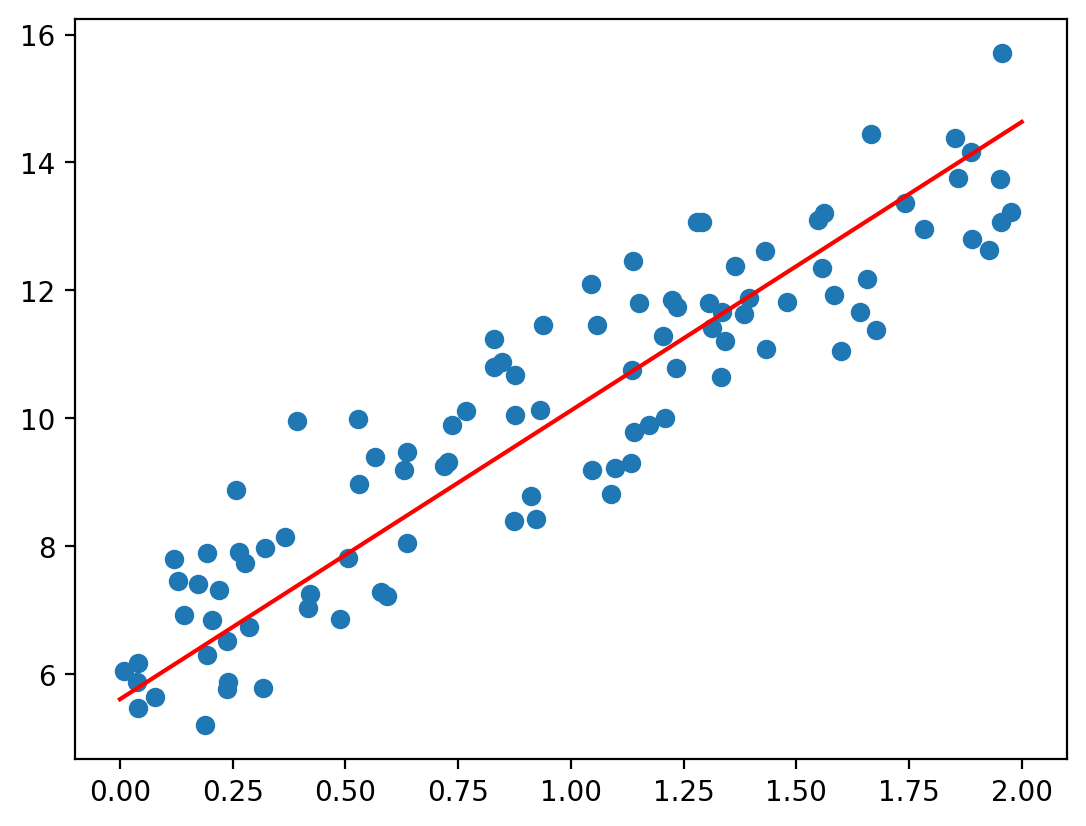

In [5]:
# a : 기울기, b = 절편, 각각 랜덤 초기화
a, b = np.random.rand(), np.random.rand()
# 학습률 
alpha = 0.05
# 몇회에 걸쳐 회귀계수를 조정할 것인지 결정
epoch = 100

for i in range(epoch):
    y_pred = a*X + b
    e = y_pred - y
    a = a - alpha*(X*e).mean() #Loss function을 미분한 수식에 따름
    b = b - alpha*(e).mean()   #Loss function을 미분한 수식에 따름
    print("a=", a.round(3), "b=", b.round(3), "error=", np.abs(e).mean().round(3))
    
xs = np.linspace(0,2,2)
ys = a*xs + b

plt.scatter(X, y)
plt.plot(xs,ys, c='r')

## 데이터 다운로드
- 실제 키-몸무게 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [6]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [84]:
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [85]:
data.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [7]:
# 단위 변환 (인치, 파운드 --> cm, kg)
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [8]:
# 사본 사용 (원본 백업)
df = data.copy()
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


## 데이터 특성

In [9]:
x = df.Height.values
y = df.Weight.values

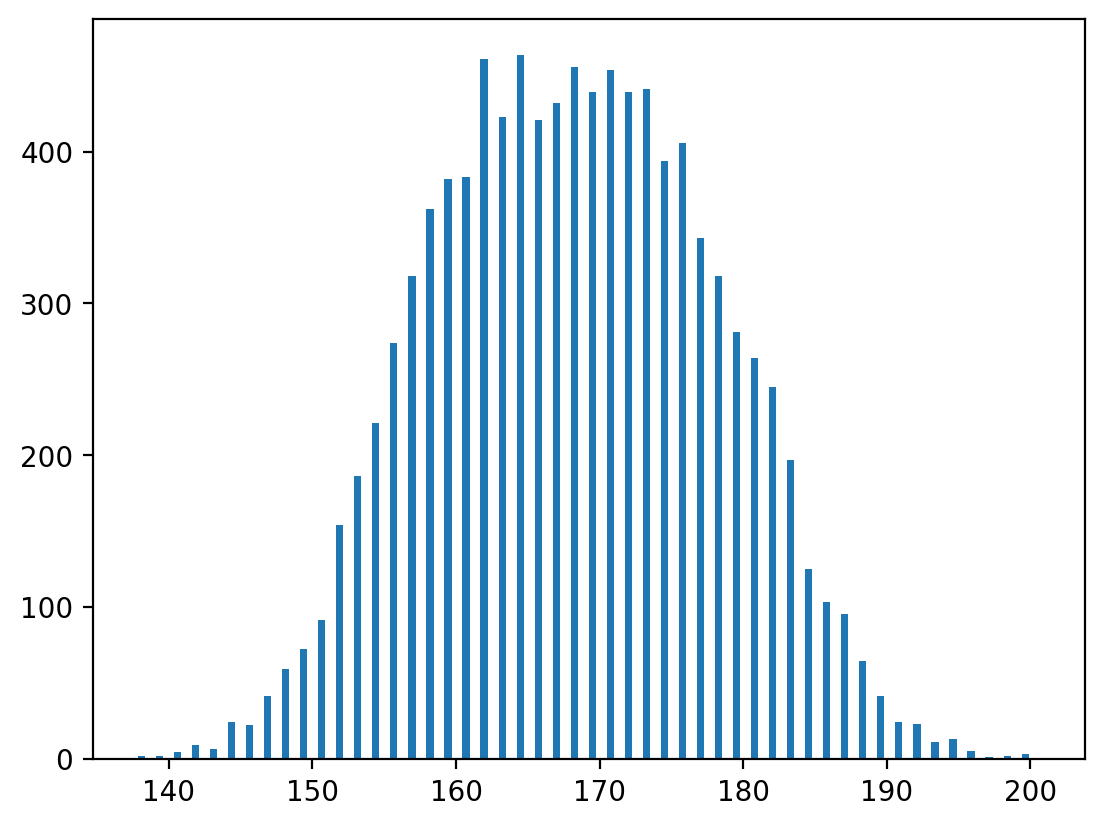

In [8]:
plt.hist(x, bins=50, width=0.5)
plt.show()

In [90]:
x.max()

200.6568055598296

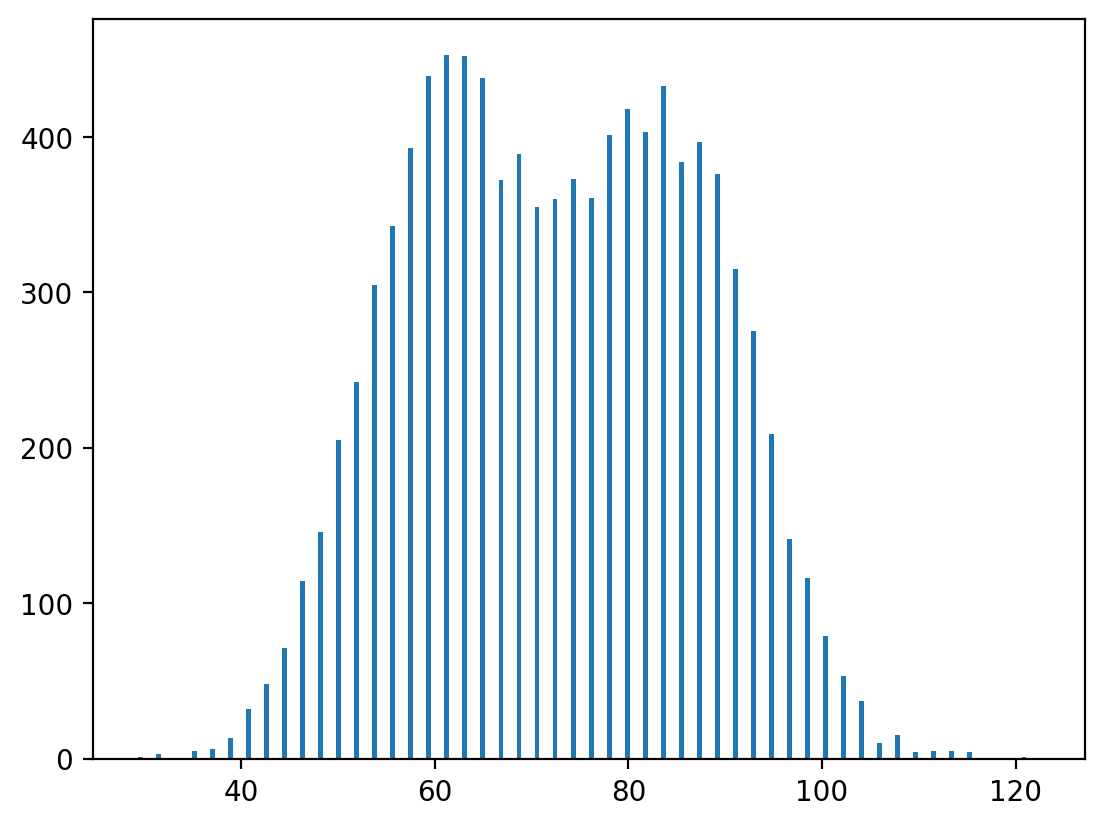

In [91]:
plt.hist(y, bins=50, width=0.5)
plt.show()

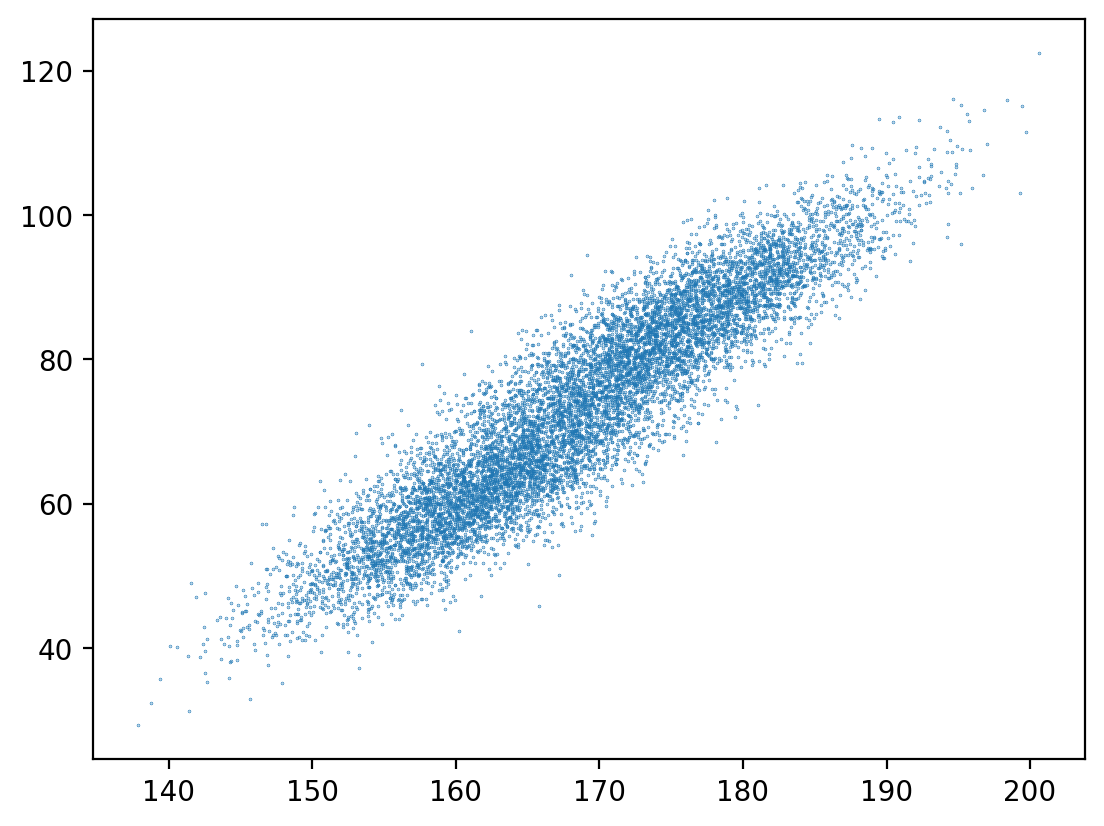

In [92]:
plt.scatter(x,y, s=0.05)

# 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [21]:
# 학습 및 검증 데이터 크기 확인
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((7500, 1), (2500, 1), (7500,), (2500,))

In [22]:
# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.reshape(-1,1), y_train) # (2) 학습
model.score(x_test.reshape(-1,1), y_test) # (3) 이용, 성능평가

0.8564316467562263

In [23]:
# 학습한 계수(파라미터)
a, b = model.coef_, model.intercept_
a, b

(array([13.49625528]), 73.16392497694608)

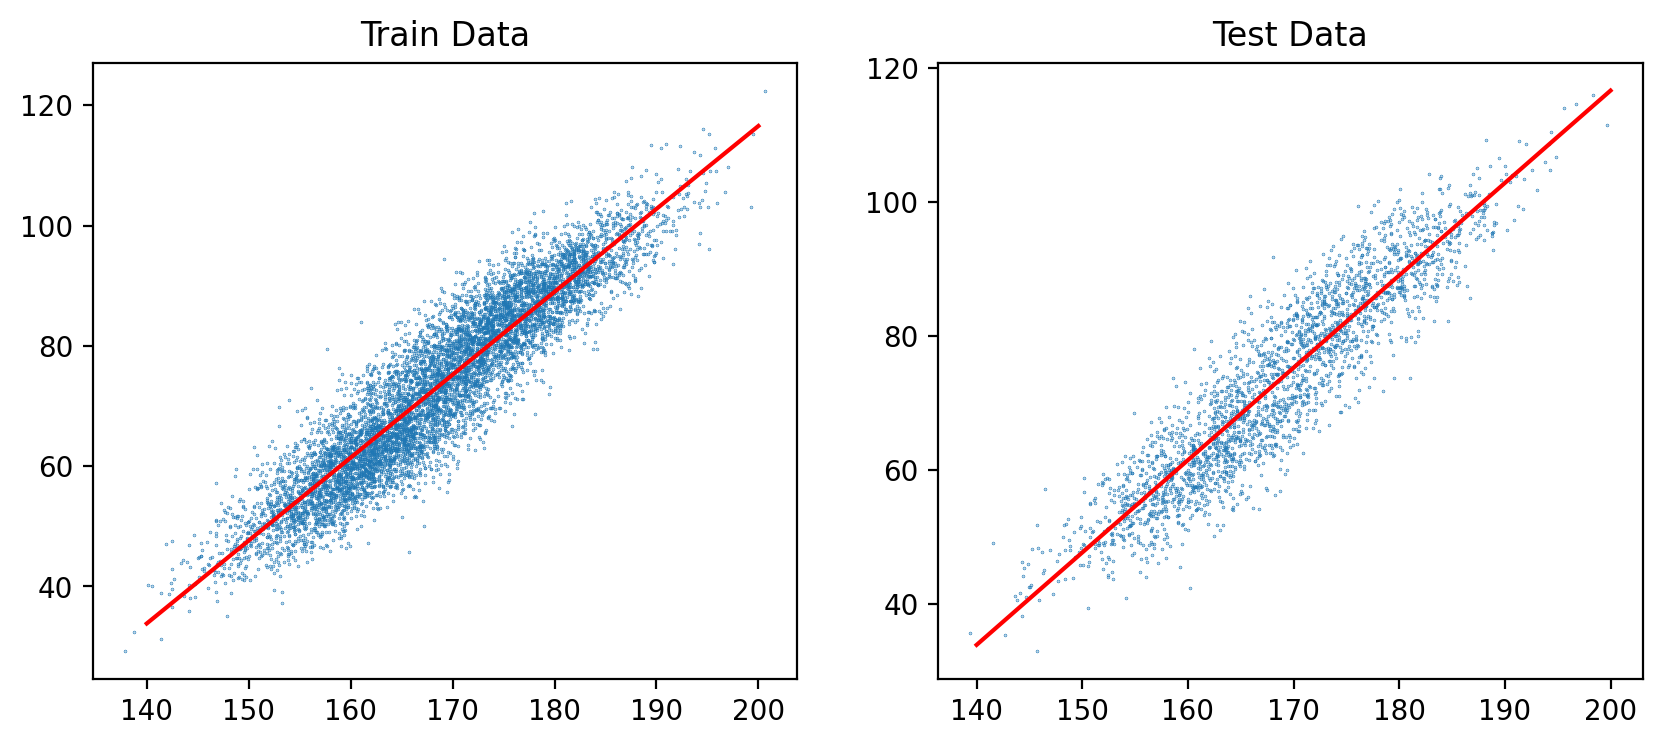

In [13]:
# 훈련과 검증 데이터에 대한 회귀 직선 보기
plt.figure(figsize=(10,4))
xs = np.linspace(140,200,2)
ys = a*xs + b

# 훈련데이터 플로팅 + 회귀직선
plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=0.05)
# 검증데이터 플로팅 + 회귀직선
plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=0.05)

## 남여 구분 정보 사용
- 추가정보를 사용함으로써 (즉, 입력 데이터의 컬럼 수를 늘임으로써) 성능이 개선되는지 확인

In [25]:
df = data.copy()
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [26]:
# Gender 컬럼의 값 확인
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [27]:
onehot = pd.get_dummies(df["Gender"], prefix="Gender")     #
df = pd.concat([df, onehot], axis=1)

df[:3]

,Gender,Height,Weight,Gender_Female,Gender_Male
0,Male,187.571423,109.720985,0,1
1,Male,174.706036,73.622732,0,1
2,Male,188.239668,96.497550,0,1


## 파라미터 최적화
- LinearRegressor는 SVD 기반의 정규방정식을 통해 회귀계수 추정
- 경사하강법을 사용하는 회귀분석을 하기 위해서는 SGDRegressor를 사용한다.
- SGDRegressor는 경사하강법의 에포크, 허용오차, 학습률, 규제(Regularization) 방식을 정할 수 있다.
- https://box-world.tistory.com/47 => LinearRegression의 구조 설명
- https://woojin.tistory.com/9 => LinearRegressor와 SGDRegressor의 차이를 설명하고 있다.

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

#SGD
scaler = StandardScaler()
x = scaler.fit_transform(df.Height.values.reshape(-1,1))
y = scaler.fit_transform(df.Weight.values.reshape(-1,1))

x_train, x_test, y_train, y_test = train_test_split(x, y)

models = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

models.fit(x_train, y_train)
print(models.score(x_test, y_test))

print(models.coef_, models.intercept_)

0.8536931796158024
[0.89208919] [0.00133114]


c:\Users\krkim1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


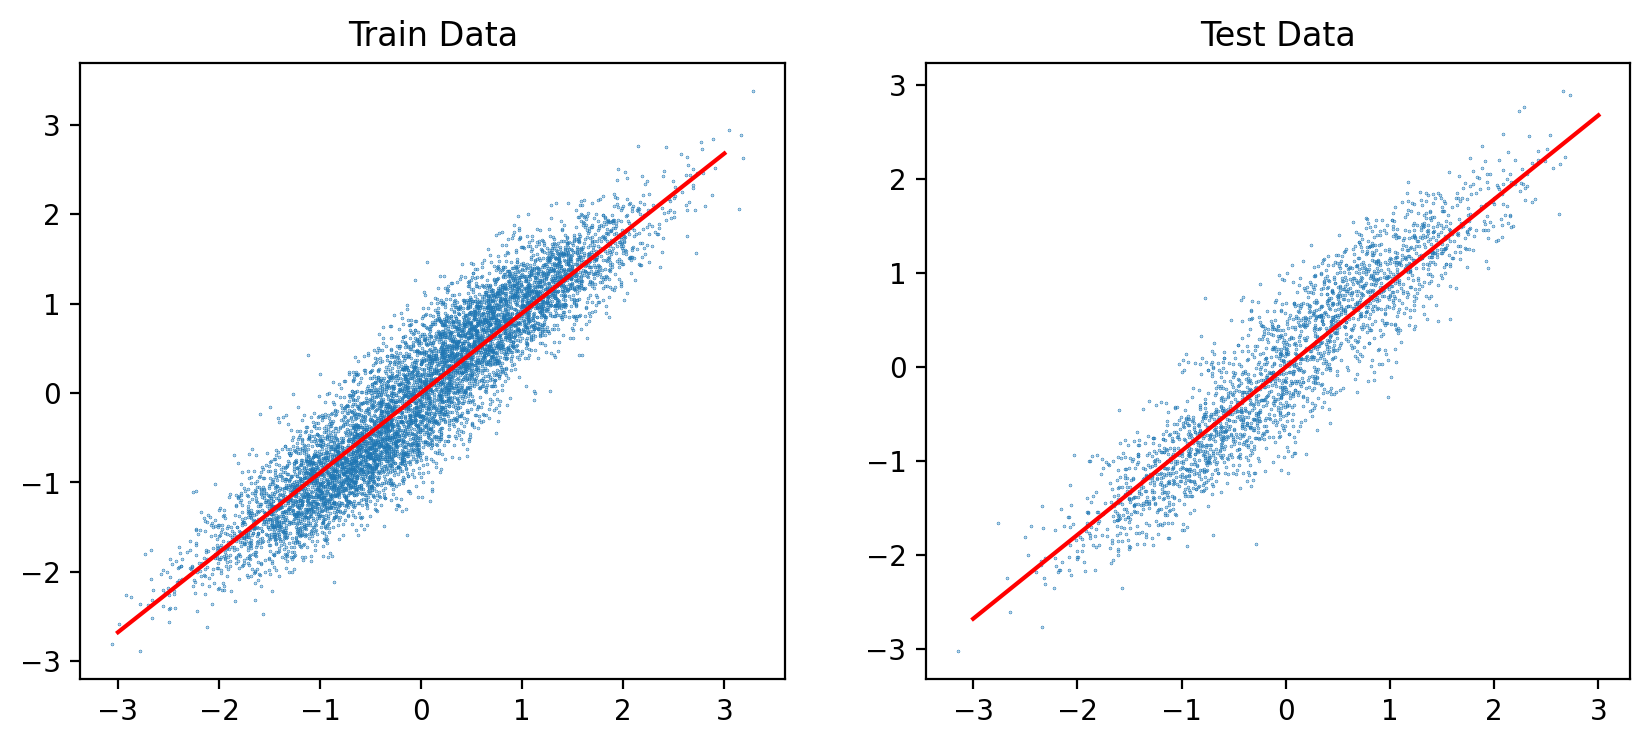

In [13]:
a = models.coef_
b = models.intercept_

# 훈련과 검증 데이터에 대한 회귀 직선 보기
plt.figure(figsize=(10,4))
xs = [-3,3]
ys = a*xs + b

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=0.05)

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=0.05)

# 성별과 키, 두개의 컬럼을 사용
- 남여의 키-몸무게 관계가 다르므로 추가 정보 사용으로 성능이 개선될 것으로 예상
- 2차원 배열 구조를 가지므로 소문자 x 대시 대문자 X를 사용한다
 - 2차원 배열을 사용하므로 reshape(-1,1)이 필요 없다

In [28]:
X = df[["Height", "Gender_Female", "Gender_Male"]]
y = df.Weight.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9018876478426087

In [106]:
X[:3]

,Height,Gender_Female,Gender_Male
0,187.571423,0,1
1,174.706036,0,1
2,188.239668,0,1


- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 다중 회귀 모델
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
- $x_{1}$: 성별, $x_{2}$: 키

In [107]:
# a1, 
print(model.coef_)
print(model.intercept_)

[ 1.0683633 -4.3634365  4.3634365]
-106.84102939786163


In [108]:
a1, a2, a3 = model.coef_[0], model.coef_[1], model.coef_[2]
b1 = model.intercept_

## 회귀직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

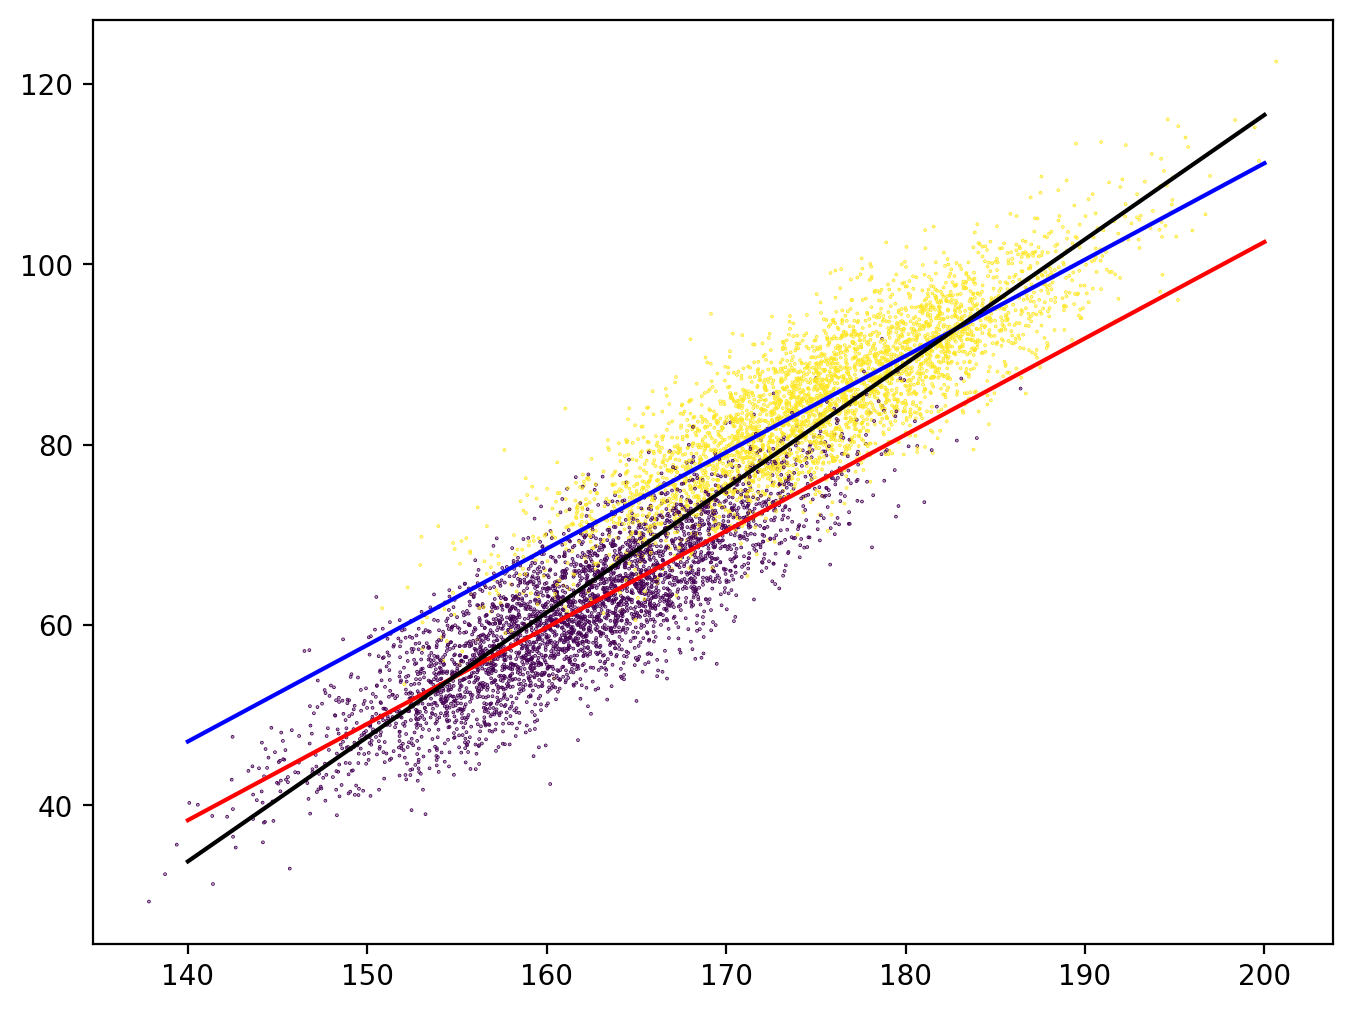

In [109]:
xs = np.linspace(140,200,2)
plt.figure(figsize=(8,6))
plt.scatter(X_train.Height, y_train, c=X_train.Gender_Male, s=0.1)

# 남성의 경우 회귀 직선 (Gender=0)
ys = a1*xs + a2*0 + a3*1 + b1
plt.plot(xs, ys, c='b')

# 여성의 경우 회귀 직선 (Gender=1)
ys = a1*xs + a2*1 + a3*0 + b1
plt.plot(xs, ys, c='r')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
ys = a*xs + b
plt.plot(xs, ys, c='k')

## 기타 성능 평가
- MAE, RMSE 값은 각각 mean_absolute_error, mean_squared_error 함수가 제공한다

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred)

3.633129097352219

In [ ]:
# RMSE 를 얻으려면 squared=False 를 설정한다
mean_squared_error(y_test, y_pred, squared=False)

4.578409817362492

In [ ]:
error = np.abs(y_pred-y_test)
error.max()

17.438196005504523

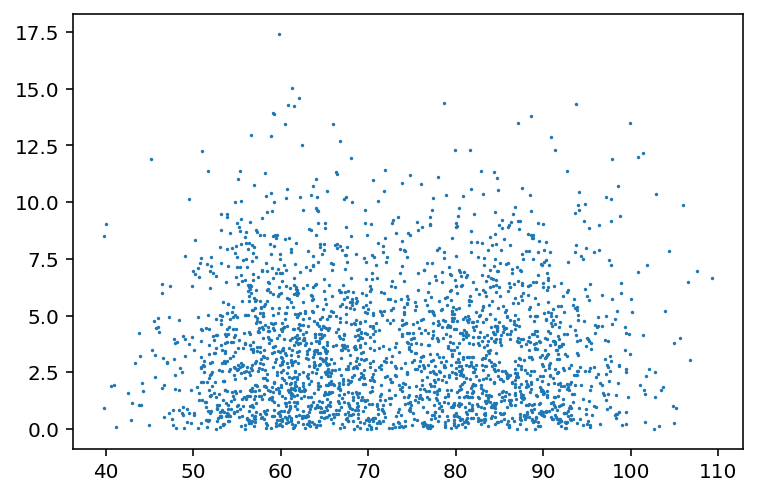

In [ ]:
plt.scatter(y_pred, error, s=0.5)